# データの読込

## 加盟店一覧のPDFをダウンロード

In [1]:
!wget https://cashless.go.jp/assets/doc/kameiten_touroku_list.pdf -O list.pdf

--2019-09-09 01:07:49--  https://cashless.go.jp/assets/doc/kameiten_touroku_list.pdf
Resolving cashless.go.jp (cashless.go.jp)... 151.101.130.133, 151.101.66.133, 151.101.194.133, ...
Connecting to cashless.go.jp (cashless.go.jp)|151.101.130.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31809865 (30M) [application/pdf]
Saving to: ‘list.pdf’

list.pdf            100%[===================>]  30.34M  6.53MB/s    in 4.3s    

2019-09-09 01:07:53 (7.04 MB/s) - ‘list.pdf’ saved [31809865/31809865]



## popplerをインストール

In [2]:
!apt install poppler-utils poppler-data

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-data is already the newest version (0.4.8-2).
poppler-utils is already the newest version (0.62.0-2ubuntu2.10).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


### PDFファイルの情報を確認

In [3]:
!pdfinfo list.pdf

Creator:        Microsoft® Excel® for Office 365
Producer:       Microsoft® Excel® for Office 365
CreationDate:   Fri Sep  6 02:04:52 2019 UTC
ModDate:        Fri Sep  6 03:07:03 2019 UTC
Tagged:         no
UserProperties: no
Suspects:       no
Form:           AcroForm
JavaScript:     no
Pages:          6360
Encrypted:      no
Page size:      595.2 x 841.92 pts (A4)
Page rot:       0
File size:      31809865 bytes
Optimized:      no
PDF version:    1.7


### ページ数確認

In [4]:
max_page = !echo $(pdfinfo list.pdf | grep Pages | awk '{print $2}')
max_page

['6360']

## tabula-pyをインストール

In [5]:
!pip install tabula-py

## PDFから表データ抽出

In [6]:
from tabula import read_pdf

pages = f"3-{max_page[0]}"

df = read_pdf("list.pdf", lattice=True, pages=pages, java_options=["-Xmx2G"], pandas_options={"names": ["No.","都道府県","市区町村","事業所名(屋号)","業種","区分","還元率"]})

df

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,No.,都道府県,市区町村,事業所名(屋号),業種,区分,還元率
0,No.,都道府県,市区町村,事業所名(屋号),業種,還元率,NaN
1,1,北海道,愛別町,愛別SS,小売業,ガソリンスタンド,2%
2,2,北海道,愛別町,セブン-イレブン愛別町店,小売業,食料品,2%
3,3,北海道,愛別町,旭川国際カントリークラブ,サービス,その他サービス,5%
4,4,北海道,愛別町,伊藤新聞販売所,小売業,その他小売,5%
5,5,北海道,愛別町,三愛自動車工業株式会社,サービス,その他サービス,5%
6,6,北海道,赤井川村,キロロリゾート,サービス,宿泊業,5%
7,7,北海道,赤井川村,有限会社赤井川ハイヤー,サービス,運輸業,5%
8,8,北海道,赤平市,赤平 SS,小売業,ガソリンスタンド,2%
9,9,北海道,赤平市,赤平平岸SS,小売業,ガソリンスタンド,2%


# データの前処理

In [0]:
# 表タイトル除去
df = df[df["No."] != "No."]

# データの整形

In [0]:
# グループ別に分ける
grouped_df = df.groupby((df["No."] == '1').cumsum())

## 固定店舗（EC・通信販売を除く）

In [0]:
df1 = grouped_df.get_group(1).copy()

In [0]:
df1.drop(columns="No.", inplace=True)

In [0]:
df1.reset_index(inplace=True, drop=True)
df1.index += 1

In [12]:
df1

,都道府県,市区町村,事業所名(屋号),業種,区分,還元率
1,北海道,愛別町,愛別SS,小売業,ガソリンスタンド,2%
2,北海道,愛別町,セブン-イレブン愛別町店,小売業,食料品,2%
3,北海道,愛別町,旭川国際カントリークラブ,サービス,その他サービス,5%
4,北海道,愛別町,伊藤新聞販売所,小売業,その他小売,5%
5,北海道,愛別町,三愛自動車工業株式会社,サービス,その他サービス,5%
6,北海道,赤井川村,キロロリゾート,サービス,宿泊業,5%
7,北海道,赤井川村,有限会社赤井川ハイヤー,サービス,運輸業,5%
8,北海道,赤平市,赤平 SS,小売業,ガソリンスタンド,2%
9,北海道,赤平市,赤平平岸SS,小売業,ガソリンスタンド,2%
10,北海道,赤平市,セブン-イレブン赤平文京町店,小売業,食料品,2%


## EC・通信販売（楽天市場）

In [0]:
df2 = grouped_df.get_group(2).copy()

In [0]:
df2.drop(columns=["No.", "事業所名(屋号)", "業種", "区分", "還元率"], inplace=True)
df2.rename(columns={"都道府県": "事業所名(屋号)", "市区町村": "還元率"}, inplace=True)

In [0]:
df2["業種"] = "EC・通信販売"
df2["区分"] = "楽天市場"

In [0]:
df2.reset_index(inplace=True, drop=True)
df2.index += 1

In [17]:
df2

,事業所名(屋号),還元率,業種,区分
1,ア・ピース・オブ・ラグジュアリー,5%,EC・通信販売,楽天市場
2,アーアゼロワン JEWELRY,5%,EC・通信販売,楽天市場
3,archiver,5%,EC・通信販売,楽天市場
4,A-ki Flower Je アーキフラージュ,5%,EC・通信販売,楽天市場
5,あーきんどう宝石,5%,EC・通信販売,楽天市場
6,アーク,5%,EC・通信販売,楽天市場
7,ARCTIC PLANT,5%,EC・通信販売,楽天市場
8,ARC Tokyo-Bay,5%,EC・通信販売,楽天市場
9,ネイルパーツのお店 ArkNail,5%,EC・通信販売,楽天市場
10,arc market,5%,EC・通信販売,楽天市場


## EC・通信販売（Yahoo!ショッピング）

In [0]:
df3 = grouped_df.get_group(3).copy()

In [0]:
df3.drop(columns=["No.", "事業所名(屋号)", "業種", "区分", "還元率"], inplace=True)
df3.rename(columns={"都道府県": "事業所名(屋号)", "市区町村": "還元率"}, inplace=True)

In [0]:
df3["業種"] = "EC・通信販売"
df3["区分"] = "Yahoo!ショッピング"

In [0]:
df3.reset_index(inplace=True, drop=True)
df3.index += 1

In [22]:
df3

,事業所名(屋号),還元率,業種,区分
1,アーアゼロワンジュエリー,5%,EC・通信販売,Yahoo!ショッピング
2,あ~e-shop!,5%,EC・通信販売,Yahoo!ショッピング
3,akas-objet,5%,EC・通信販売,Yahoo!ショッピング
4,archiv3r,5%,EC・通信販売,Yahoo!ショッピング
5,アーカムYahoo!店,5%,EC・通信販売,Yahoo!ショッピング
6,アーキショップ・ヒロ,5%,EC・通信販売,Yahoo!ショッピング
7,archiss,5%,EC・通信販売,Yahoo!ショッピング
8,アーキトレード,5%,EC・通信販売,Yahoo!ショッピング
9,アーキフラージュ,5%,EC・通信販売,Yahoo!ショッピング
10,アーク,5%,EC・通信販売,Yahoo!ショッピング


## EC・通信販売（その他ECサイト）

In [0]:
df4 = grouped_df.get_group(4).copy()

In [0]:
df4.drop(columns=["No.", "事業所名(屋号)", "業種", "区分", "還元率"], inplace=True)
df4.rename(columns={"都道府県": "事業所名(屋号)", "市区町村": "還元率"}, inplace=True)

In [0]:
df4["業種"] = "EC・通信販売"
df4["区分"] = "その他ECサイト"

In [0]:
df4.reset_index(inplace=True, drop=True)
df4.index += 1

In [27]:
df4

,事業所名(屋号),還元率,業種,区分
1,ア ウエストーアッシュ,5%,EC・通信販売,その他ECサイト
2,アーカム株式会社,5%,EC・通信販売,その他ECサイト
3,アークス オンラインショップ,5%,EC・通信販売,その他ECサイト
4,Arknets,5%,EC・通信販売,その他ECサイト
5,EarthAid,5%,EC・通信販売,その他ECサイト
6,アースコンタクト,5%,EC・通信販売,その他ECサイト
7,アースビューティーショップ,5%,EC・通信販売,その他ECサイト
8,EARTH MARKET,5%,EC・通信販売,その他ECサイト
9,Earth Miracle Towel,5%,EC・通信販売,その他ECサイト
10,アーチホールセール,5%,EC・通信販売,その他ECサイト


## データを連結

In [0]:
import pandas as pd

In [0]:
df_all = pd.concat([df1, df2, df3, df4], sort = False)
df_all["還元率"] = df_all["還元率"].str.rstrip("%").astype(float)

In [30]:
df_all

,都道府県,市区町村,事業所名(屋号),業種,区分,還元率
1,北海道,愛別町,愛別SS,小売業,ガソリンスタンド,2.0
2,北海道,愛別町,セブン-イレブン愛別町店,小売業,食料品,2.0
3,北海道,愛別町,旭川国際カントリークラブ,サービス,その他サービス,5.0
4,北海道,愛別町,伊藤新聞販売所,小売業,その他小売,5.0
5,北海道,愛別町,三愛自動車工業株式会社,サービス,その他サービス,5.0
6,北海道,赤井川村,キロロリゾート,サービス,宿泊業,5.0
7,北海道,赤井川村,有限会社赤井川ハイヤー,サービス,運輸業,5.0
8,北海道,赤平市,赤平 SS,小売業,ガソリンスタンド,2.0
9,北海道,赤平市,赤平平岸SS,小売業,ガソリンスタンド,2.0
10,北海道,赤平市,セブン-イレブン赤平文京町店,小売業,食料品,2.0


## ファイルに保存

In [0]:
df_all.to_csv('kameiten_touroku_list.tsv', sep='\t')

# データの分析

In [32]:
!pip install japanize-matplotlib

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

import japanize_matplotlib

In [34]:
df_all.describe()

,還元率
count,281801.000000
mean,4.598770
std,1.021131
min,2.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


## 都道府県別加盟店登録申請数

### ランキング

In [35]:
pref_rank = pd.DataFrame(df_all.groupby(by="都道府県").size(), columns=["申請数"]).reset_index()

pref_rank["順位"] = pref_rank["申請数"].rank(ascending=False, method="min").astype(int)

# 順位で昇順
pref_rank.sort_values("順位", inplace=True)


# 順位をインデックスに変更
pref_rank.set_index("順位", inplace=True)

pref_rank

,都道府県,申請数
順位,,
1,東京都,35533
2,大阪府,17808
3,愛知県,12927
4,神奈川県,12383
5,北海道,10902
6,兵庫県,10876
7,福岡県,9919
8,埼玉県,8304
9,千葉県,7525


### グラフ

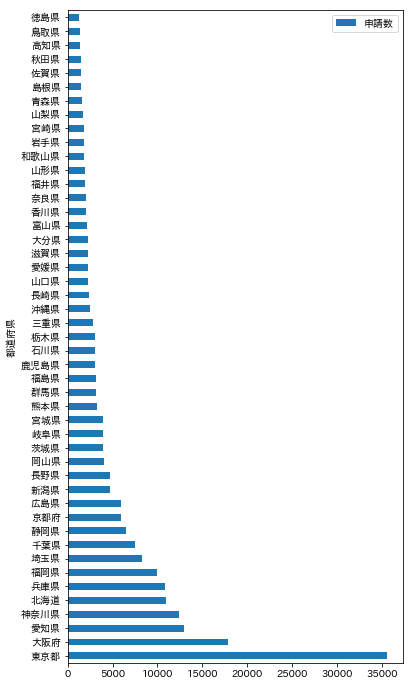

In [36]:
pref_rank.plot.barh(x="都道府県", y="申請数", figsize=(6, 12))

## 区分別申請数

### ランキング

In [37]:
indust_rank = pd.DataFrame(df_all.groupby(by="区分").size(), columns=["申請数"]).reset_index()
indust_rank["順位"] = indust_rank["申請数"].rank(ascending=False, method="min").astype(int)

# 順位で昇順
indust_rank.sort_values("順位", inplace=True)


# 順位をインデックスに変更
indust_rank.set_index("順位", inplace=True)

indust_rank

,区分,申請数
順位,,
1,飲食業,42899
2,その他サービス,35742
3,その他小売,32972
4,食料品,30645
5,理容・美容業,25117
6,楽天市場,22074
7,Yahoo!ショッピング,20447
8,衣料品,16315
9,ガソリンスタンド,14814


### 還元率別内訳

In [38]:
df_indust = pd.pivot_table(df_all, index="区分", columns="還元率", values="事業所名(屋号)", aggfunc='count').fillna(0).astype(int)
df_indust

還元率,2.0,5.0
区分,,
Yahoo!ショッピング,0,20447
その他ECサイト,92,6797
その他サービス,1565,34177
その他小売,781,32191
ガソリンスタンド,14743,71
家具・調度品,5,4061
宿泊業,45,6994
書籍・玩具・音楽CD,82,2728
楽天市場,0,22074


### グラフ

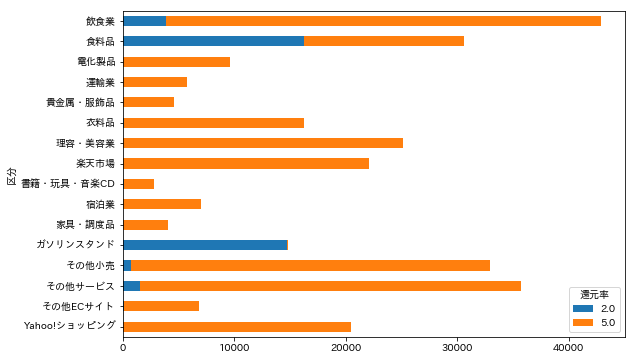

In [39]:
df_indust.plot.barh(stacked=True, figsize=(9, 6))

## バイオリン図

[Text(0, 0, 'ガソリンスタンド'),
 Text(0, 0, '食料品'),
 Text(0, 0, 'その他サービス'),
 Text(0, 0, 'その他小売'),
 Text(0, 0, '宿泊業'),
 Text(0, 0, '運輸業'),
 Text(0, 0, '飲食業'),
 Text(0, 0, '電化製品'),
 Text(0, 0, '理容・美容業'),
 Text(0, 0, '貴金属・服飾品'),
 Text(0, 0, '衣料品'),
 Text(0, 0, '家具・調度品'),
 Text(0, 0, '書籍・玩具・音楽CD'),
 Text(0, 0, '楽天市場'),
 Text(0, 0, 'Yahoo!ショッピング'),
 Text(0, 0, 'その他ECサイト')]

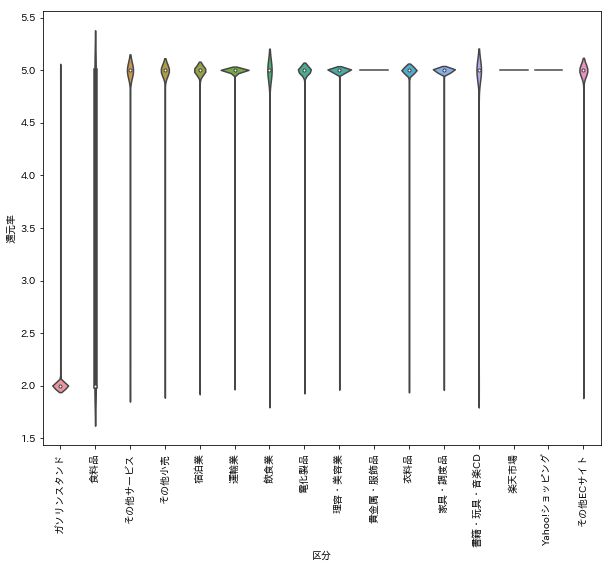

In [40]:
plt.figure(figsize=(10, 8))
p = sns.violinplot(x="区分", y="還元率", data=df_all)
p.set_xticklabels(p.get_xticklabels(), rotation=90)

# ダウンロード

In [0]:
from google.colab import files

files.download('kameiten_touroku_list.tsv')